In [19]:
import pandas as pd
import os
import numpy as np
import random
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [20]:
df = pd.read_excel('../default of credit card clients.xls', header=1, skiprows = 0, index_col = 0)
df.rename(index=str, columns={"default payment next month": "defaultPayment"}, inplace=True)

And have a look at its structure

In [21]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null int64

### The outcome variable

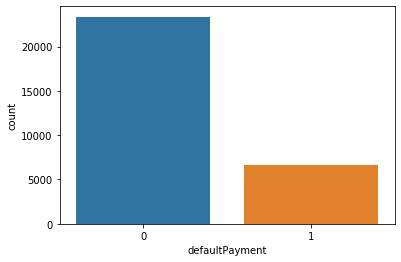

In [23]:
sns.countplot(x = df['defaultPayment'], data = df)

In [24]:
df['defaultPayment'].value_counts()

0    23364
1     6636
Name: defaultPayment, dtype: int64

## Data cleaning

Drop the zeros for BILL_AMT and PAY_AMT because then people have no money at the bank

In [25]:
#Drop the zeros 
df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0)].index)

df = df.drop(df[(df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)

df.shape

(28497, 24)

## The categorical variables

2    13477
1     9893
3     4684
5      266
4      116
6       48
0       13
Name: EDUCATION, dtype: int64

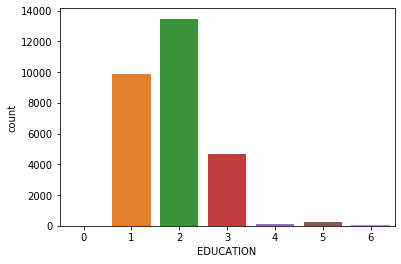

In [26]:
sns.countplot(x = df['EDUCATION'], data = df)
df['EDUCATION'].unique()
df['EDUCATION'].value_counts()

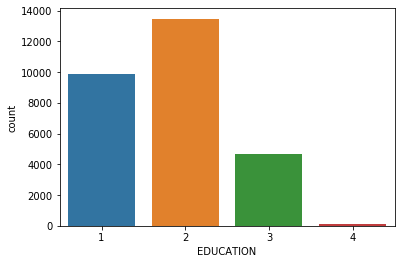

In [27]:
df = df.drop(df[(df.EDUCATION == 0) |
                (df.EDUCATION == 5) |
                (df.EDUCATION == 6)].index)

sns.countplot(x = df['EDUCATION'], data = df)

array([2, 1])

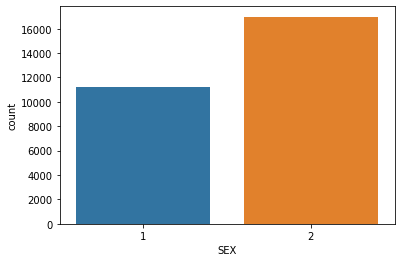

In [28]:
sns.countplot(x = df['SEX'], data = df)
df['SEX'].unique()

2    15086
1    12726
3      309
0       49
Name: MARRIAGE, dtype: int64

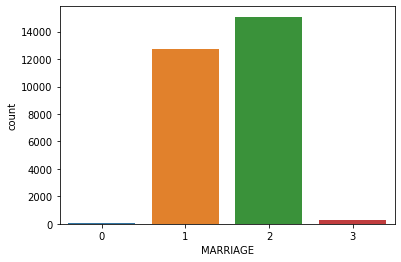

In [29]:
sns.countplot(x = df['MARRIAGE'], data = df)

df['MARRIAGE'].unique()
df['MARRIAGE'].value_counts()

2    15086
1    12726
3      309
Name: MARRIAGE, dtype: int64

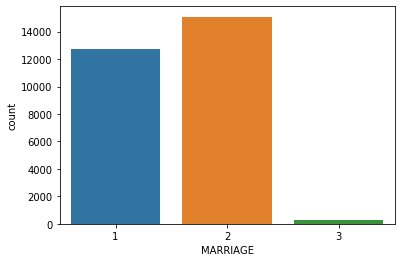

In [30]:
df = df.drop(df[(df.MARRIAGE == 0)].index)

sns.countplot(x = df['MARRIAGE'], data = df)

df['MARRIAGE'].unique()
df['MARRIAGE'].value_counts()

 0    14382
-1     5474
 1     3054
 2     2539
-2     2300
 3      251
 4       73
 5       21
 6       10
 7        9
 8        8
Name: PAY_0, dtype: int64

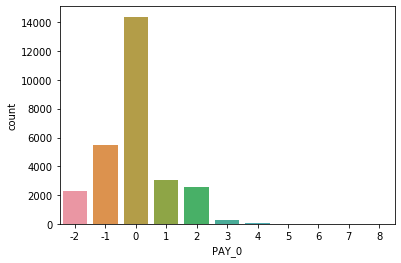

In [31]:
sns.countplot(x = df['PAY_0'], data = df)
df['PAY_0'].unique()

df['PAY_0'].value_counts()

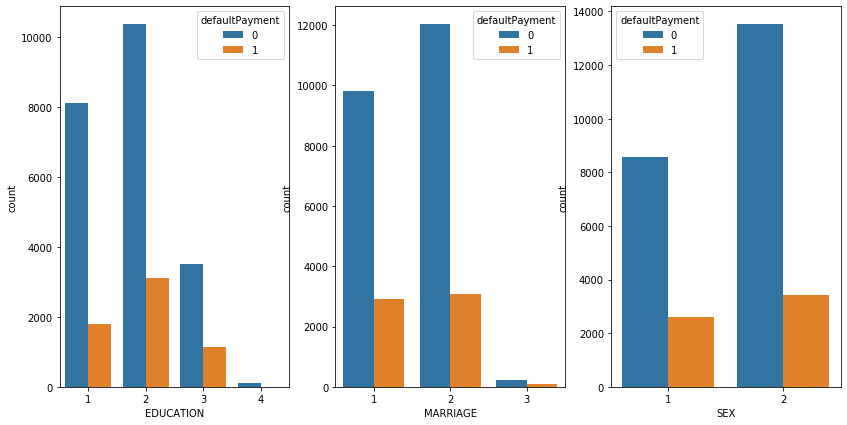

In [32]:
fig1, ax = plt.subplots(figsize = (14, 7), ncols = 3)
sns.countplot(x = df['EDUCATION'], hue = df['defaultPayment'], data = df, ax = ax[0])
sns.countplot(x = df['MARRIAGE'], hue = df['defaultPayment'], data = df, ax = ax[1])
sns.countplot(x = df['SEX'], hue = df['defaultPayment'], data = df, ax = ax[2])
#fig1.savefig('./Images/Education_marriage_plot.png')
plt.show()

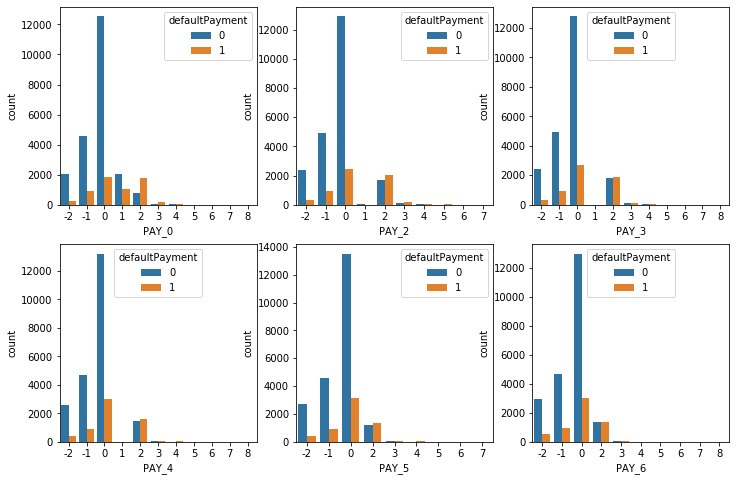

In [33]:
fig2, ax = plt.subplots(figsize=(12,8), ncols=3, nrows=2)
sns.countplot(x = df['PAY_0'], hue = df['defaultPayment'], data = df, ax = ax[0][0])
sns.countplot(x = df['PAY_2'], hue = df['defaultPayment'], data = df, ax = ax[0][1])
sns.countplot(x = df['PAY_3'], hue = df['defaultPayment'], data = df, ax = ax[0][2])
sns.countplot(x = df['PAY_4'], hue = df['defaultPayment'], data = df, ax = ax[1][0])
sns.countplot(x = df['PAY_5'], hue = df['defaultPayment'], data = df, ax = ax[1][1])
sns.countplot(x = df['PAY_6'], hue = df['defaultPayment'], data = df, ax = ax[1][2])
plt.show()

## The numerical variables

In [34]:
# the numerical cats are X1 (LIMIT_BAL), X5 (AGE), X12-X17 (BILL_AMT1-6) and X18-X23 (PAY_AMT1-6)

In [35]:
df_out = df.copy()

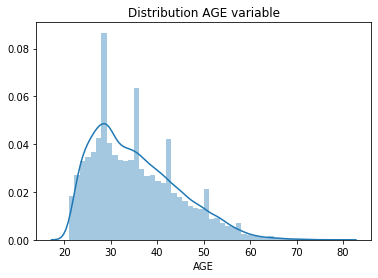

In [36]:
fig = sns.distplot(df['AGE'])
plt.title('Distribution AGE variable')

plt.savefig('./Images/AGE_distribution.png')

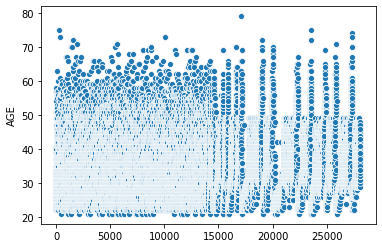

In [37]:
sns.scatterplot(range(len(df['AGE'])), df['AGE'])

In [39]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1 = datacolumn.quantile(0.25)
    Q3 = datacolumn.quantile(0.75)
    IQR = Q3 - Q1
    return Q1,Q3,IQR 

In [40]:
Q1_LIMIT_BAL, Q3_LIMIT_BAL, iqr_LIMIT_BAL = outlier_treatment(df_out['LIMIT_BAL'])

l_limit = Q1_LIMIT_BAL - (1.5 * iqr_LIMIT_BAL)
u_limit = Q3_LIMIT_BAL + (1.5 * iqr_LIMIT_BAL)

In [41]:
Q1_BILL = df_out.loc[:, 'BILL_AMT1':'BILL_AMT6'].quantile(0.25)
Q3_BILL = df_out.loc[:, 'BILL_AMT1':'BILL_AMT6'].quantile(0.75)
IQR_BILL = Q3_BILL - Q1_BILL

In [42]:
Q1_PAY = df_out.loc[:, 'PAY_AMT1':'PAY_AMT6'].quantile(0.25)
Q3_PAY = df_out.loc[:, 'PAY_AMT1':'PAY_AMT6'].quantile(0.75)
IQR_PAY = Q3_PAY - Q1_PAY

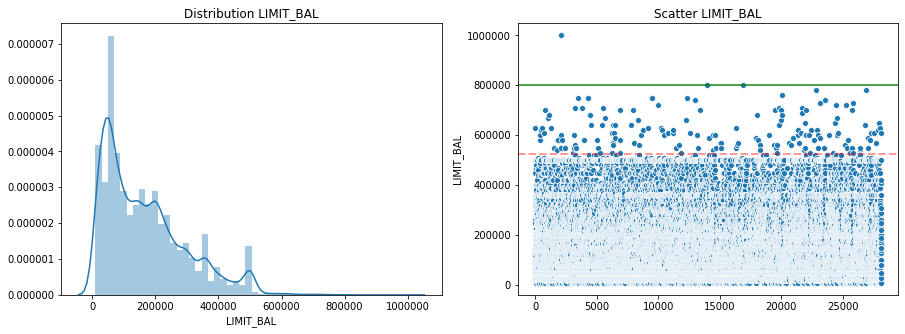

In [43]:
fig1, ax = plt.subplots(figsize=(15,5), ncols=2)
sns.distplot(df['LIMIT_BAL'], ax = ax[0])
sns.scatterplot(range(len(df['LIMIT_BAL'])), df['LIMIT_BAL'], ax = ax[1])

fig1.axes[1].axhline(y = u_limit, color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig1.axes[1].axhline(y = 800000, color='green', linewidth=2, alpha=.7)

ax[0].set_title('Distribution LIMIT_BAL')
ax[1].set_title('Scatter LIMIT_BAL')


fig1.savefig('./Images/LIMITBAL_dist_scatter.png')

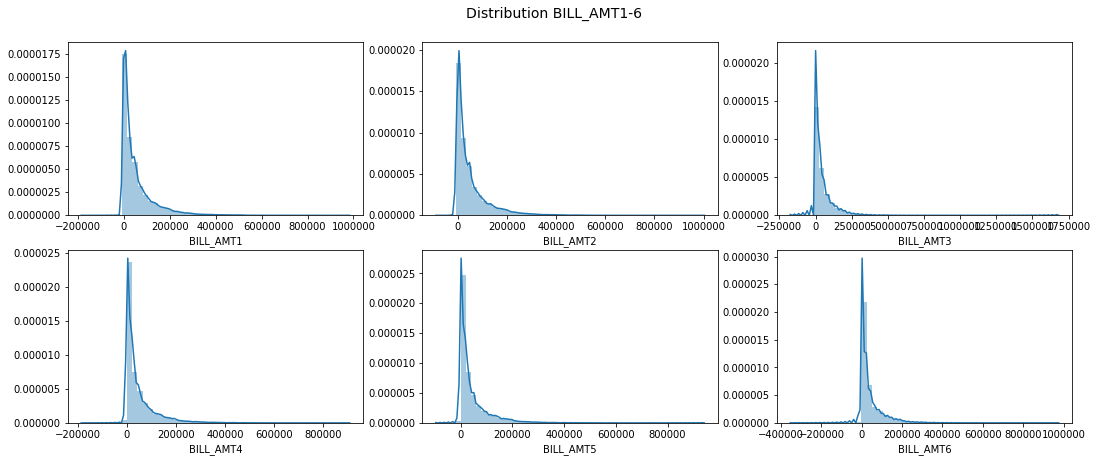

In [44]:
fig8, ax = plt.subplots(figsize=(18,7), ncols=3, nrows=2)
sns.distplot(df['BILL_AMT1'], ax = ax[0,0])
sns.distplot(df['BILL_AMT2'], ax = ax[0,1])
sns.distplot(df['BILL_AMT3'], ax = ax[0,2])
sns.distplot(df['BILL_AMT4'], ax = ax[1,0])
sns.distplot(df['BILL_AMT5'], ax = ax[1,1])
sns.distplot(df['BILL_AMT6'], ax = ax[1,2])

fig8.suptitle('Distribution BILL_AMT1-6', fontsize = 14, y = 0.95)

fig8.savefig('./Images/BILLAMT_distribution.png')

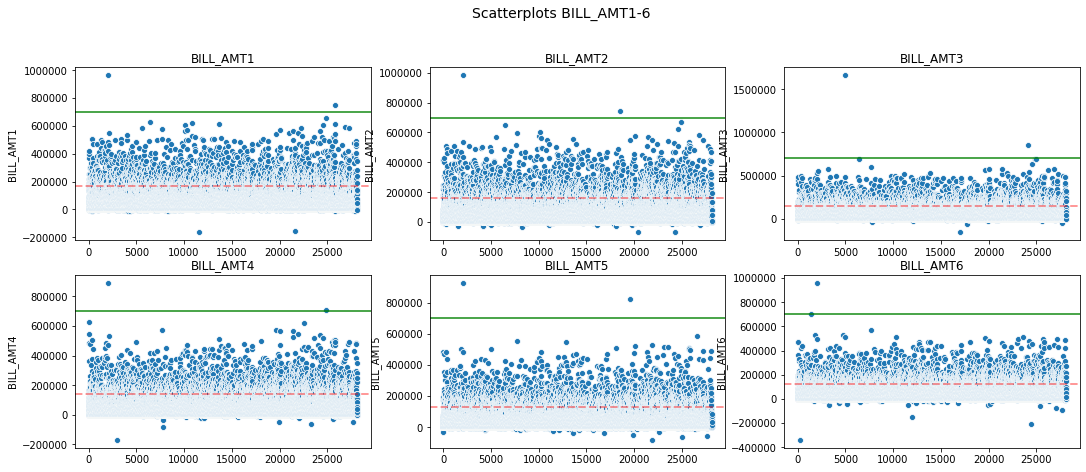

In [45]:
fig9, ax = plt.subplots(figsize=(18,7), ncols=3, nrows=2)
sns.scatterplot(range(len(df['BILL_AMT1'])), df['BILL_AMT1'], ax = ax[0,0])
sns.scatterplot(range(len(df['BILL_AMT2'])), df['BILL_AMT2'], ax = ax[0,1])
sns.scatterplot(range(len(df['BILL_AMT3'])), df['BILL_AMT3'], ax = ax[0,2])
sns.scatterplot(range(len(df['BILL_AMT4'])), df['BILL_AMT4'], ax = ax[1,0])
sns.scatterplot(range(len(df['BILL_AMT5'])), df['BILL_AMT5'], ax = ax[1,1])
sns.scatterplot(range(len(df['BILL_AMT6'])), df['BILL_AMT6'], ax = ax[1,2])

fig9.axes[0].axhline(y = (Q3_BILL[0] + (1.5 * IQR_BILL[0])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig9.axes[1].axhline(y = (Q3_BILL[1] + (1.5 * IQR_BILL[1])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig9.axes[2].axhline(y = (Q3_BILL[2] + (1.5 * IQR_BILL[2])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig9.axes[3].axhline(y = (Q3_BILL[3] + (1.5 * IQR_BILL[3])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig9.axes[4].axhline(y = (Q3_BILL[4] + (1.5 * IQR_BILL[4])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig9.axes[5].axhline(y = (Q3_BILL[5] + (1.5 * IQR_BILL[5])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)

fig9.axes[0].axhline(y = 700000, color='green', linewidth=2, alpha=.7)
fig9.axes[1].axhline(y = 700000, color='green', linewidth=2, alpha=.7)
fig9.axes[2].axhline(y = 700000, color='green', linewidth=2, alpha=.7)
fig9.axes[3].axhline(y = 700000, color='green', linewidth=2, alpha=.7)
fig9.axes[4].axhline(y = 700000, color='green', linewidth=2, alpha=.7)
fig9.axes[5].axhline(y = 700000, color='green', linewidth=2, alpha=.7)

ax[0, 0].set_title('BILL_AMT1')
ax[0, 1].set_title('BILL_AMT2')
ax[0, 2].set_title('BILL_AMT3')
ax[1, 0].set_title('BILL_AMT4')
ax[1, 1].set_title('BILL_AMT5')
ax[1, 2].set_title('BILL_AMT6')

fig9.suptitle('Scatterplots BILL_AMT1-6', fontsize = 14, y = 1)

fig9.savefig('./Images/BILLAMT_scatter.png')

#sns.lineplot(x=x_pred, y=y_pred, ax=ax)
plt.show()

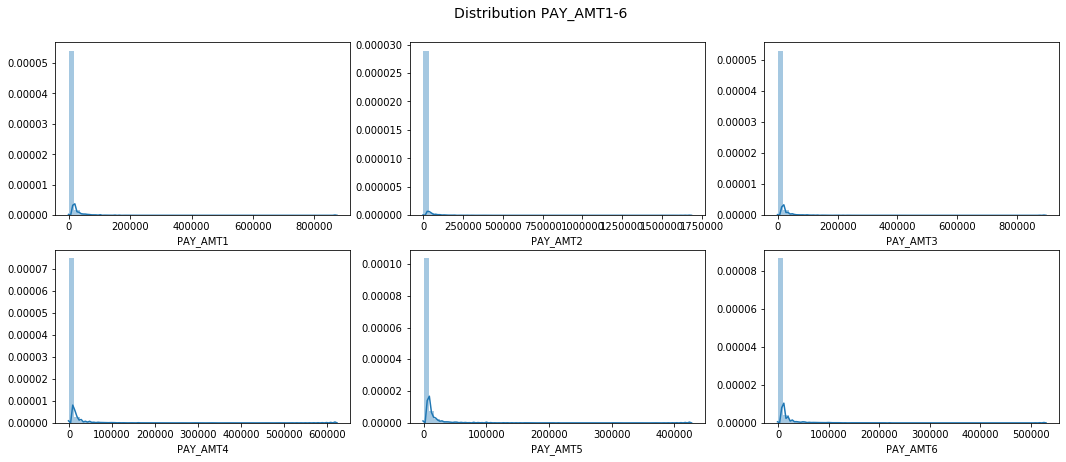

In [46]:
fig7, ax = plt.subplots(figsize=(18,7), ncols=3, nrows=2)
sns.distplot(df['PAY_AMT1'], ax = ax[0,0])
sns.distplot(df['PAY_AMT2'], ax = ax[0,1])
sns.distplot(df['PAY_AMT3'], ax = ax[0,2])
sns.distplot(df['PAY_AMT4'], ax = ax[1,0])
sns.distplot(df['PAY_AMT5'], ax = ax[1,1])
sns.distplot(df['PAY_AMT6'], ax = ax[1,2])

fig7.suptitle('Distribution PAY_AMT1-6', fontsize = 14, y = 0.95)

fig7.savefig('./Images/PAYAMT_distribution.png')

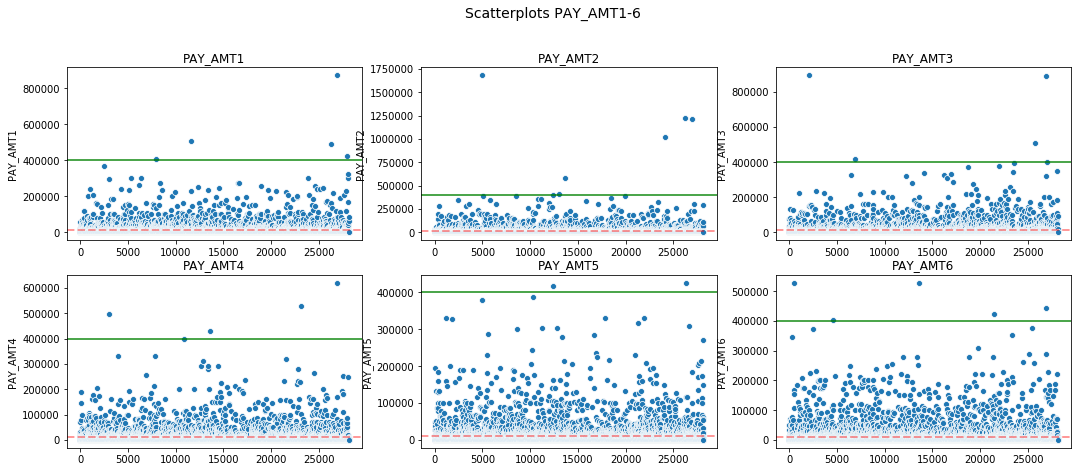

In [47]:
fig10, ax = plt.subplots(figsize=(18,7), ncols=3, nrows=2)
sns.scatterplot(range(len(df['PAY_AMT1'])), df['PAY_AMT1'], ax = ax[0,0])
sns.scatterplot(range(len(df['PAY_AMT2'])), df['PAY_AMT2'], ax = ax[0,1])
sns.scatterplot(range(len(df['PAY_AMT3'])), df['PAY_AMT3'], ax = ax[0,2])
sns.scatterplot(range(len(df['PAY_AMT4'])), df['PAY_AMT4'], ax = ax[1,0])
sns.scatterplot(range(len(df['PAY_AMT5'])), df['PAY_AMT5'], ax = ax[1,1])
sns.scatterplot(range(len(df['PAY_AMT6'])), df['PAY_AMT6'], ax = ax[1,2])

fig10.axes[0].axhline(y = (Q3_PAY[0] + (1.5 * IQR_PAY[0])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig10.axes[1].axhline(y = (Q3_PAY[1] + (1.5 * IQR_PAY[1])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig10.axes[2].axhline(y = (Q3_PAY[2] + (1.5 * IQR_PAY[2])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig10.axes[3].axhline(y = (Q3_PAY[3] + (1.5 * IQR_PAY[3])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig10.axes[4].axhline(y = (Q3_PAY[4] + (1.5 * IQR_PAY[4])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)
fig10.axes[5].axhline(y = (Q3_PAY[5] + (1.5 * IQR_PAY[5])), color='red', linestyle = 'dashed', linewidth=2, alpha=.4)

fig10.axes[0].axhline(y = 400000, color='green', linewidth=2, alpha=.7)
fig10.axes[1].axhline(y = 400000, color='green', linewidth=2, alpha=.7)
fig10.axes[2].axhline(y = 400000, color='green', linewidth=2, alpha=.7)
fig10.axes[3].axhline(y = 400000, color='green', linewidth=2, alpha=.7)
fig10.axes[4].axhline(y = 400000, color='green', linewidth=2, alpha=.7)
fig10.axes[5].axhline(y = 400000, color='green', linewidth=2, alpha=.7)


ax[0, 0].set_title('PAY_AMT1')
ax[0, 1].set_title('PAY_AMT2')
ax[0, 2].set_title('PAY_AMT3')
ax[1, 0].set_title('PAY_AMT4')
ax[1, 1].set_title('PAY_AMT5')
ax[1, 2].set_title('PAY_AMT6')

fig10.suptitle('Scatterplots PAY_AMT1-6', fontsize = 14, y = 1)

fig10.savefig('./Images/PAYAMT_scatter.png')


And remove the outlier data

In [51]:
data_todrop1 = (df_out[(df_out['LIMIT_BAL'] > 800000)].index)
data_todrop2 = df_out.loc[:, 'BILL_AMT1':'BILL_AMT6'][((df_out.loc[:, 'BILL_AMT1':'BILL_AMT6'] < 0) |(df_out.loc[:, 'BILL_AMT1':'BILL_AMT6'] > 700000)).any(axis=1)]
data_todrop3 = df_out.loc[:, 'PAY_AMT1':'PAY_AMT6'][((df_out.loc[:, 'PAY_AMT1':'PAY_AMT6'] < 0) | (df_out.loc[:, 'PAY_AMT1':'PAY_AMT6'] > 400000)).any(axis=1)]
print(data_todrop1.shape)
print(data_todrop2.shape)
print(data_todrop3.shape)

(1,)
(1820, 6)
(24, 6)


In [52]:
data_todrop1 = data_todrop1.to_numpy()
data_todrop2 = data_todrop2.index.values
data_todrop3 = data_todrop3.index.values

In [53]:
data_todrop = np.concatenate((data_todrop1, data_todrop2, data_todrop3), axis=0)
data_todrop.shape

(1845,)

In [54]:
data_todrop = np.unique(data_todrop)
data_todrop.shape

(1839,)

In [55]:
df_out.drop(data_todrop, inplace = True)

print(df.shape)
print(df_out.shape)

(28121, 24)
(26282, 24)


#### Now we can plot the variables without the outliers 

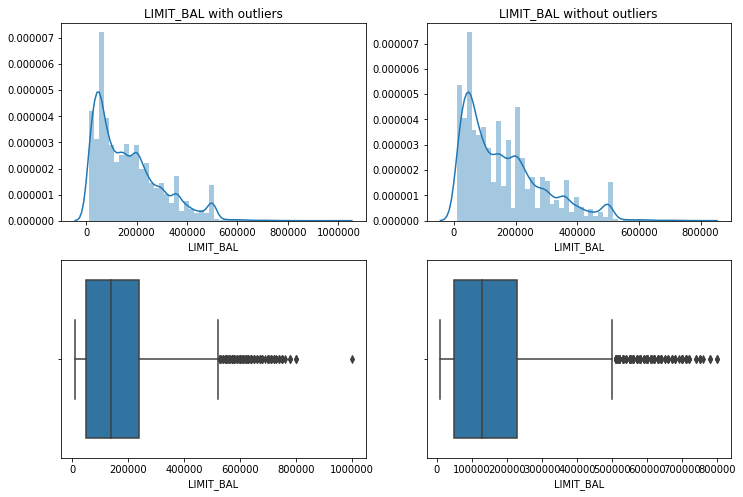

In [56]:
fig11, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
sns.distplot(df['LIMIT_BAL'], ax = ax[0][0])
sns.distplot(df_out['LIMIT_BAL'], ax = ax[0][1])
sns.boxplot(x=df['LIMIT_BAL'], ax = ax[1][0])
sns.boxplot(x=df_out['LIMIT_BAL'], ax = ax[1][1])

ax[0, 0].set_title('LIMIT_BAL with outliers')
ax[0, 1].set_title('LIMIT_BAL without outliers')

fig11.savefig('./Images/LIMITBAL_outliers.png')

plt.show()

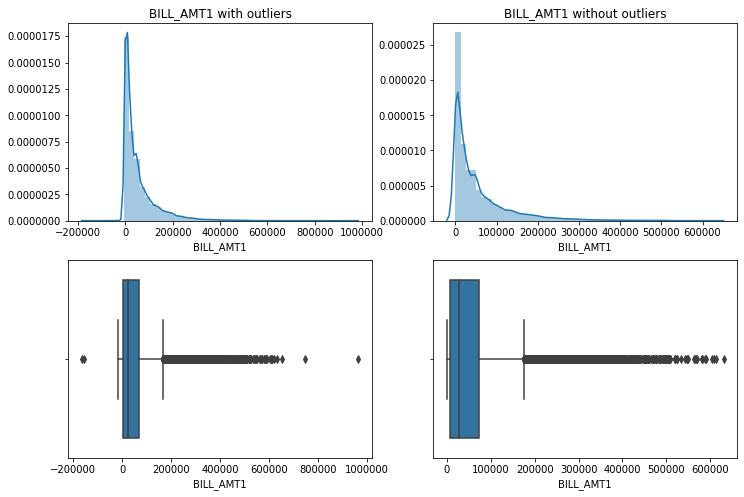

In [57]:
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
sns.distplot(df['BILL_AMT1'], ax = ax[0][0])
sns.distplot(df_out['BILL_AMT1'], ax = ax[0][1])
sns.boxplot(x=df['BILL_AMT1'], ax = ax[1][0])
sns.boxplot(x=df_out['BILL_AMT1'], ax = ax[1][1])

ax[0, 0].set_title('BILL_AMT1 with outliers')
ax[0, 1].set_title('BILL_AMT1 without outliers')

plt.show()

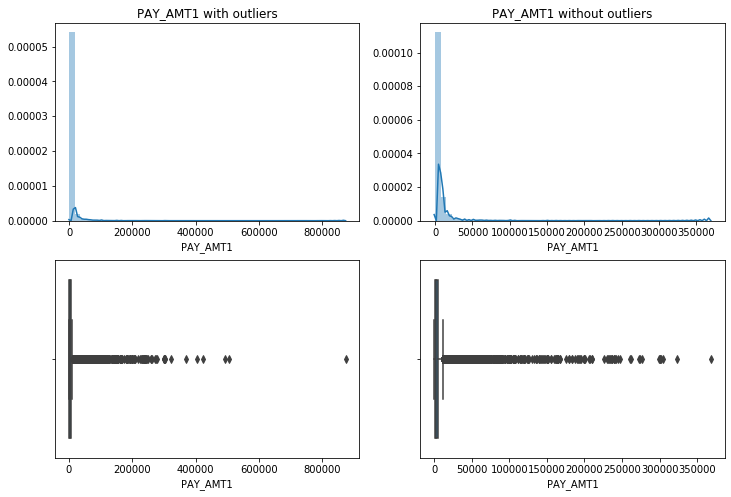

In [58]:
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
sns.distplot(df['PAY_AMT1'], ax = ax[0][0])
sns.distplot(df_out['PAY_AMT1'], ax = ax[0][1])
sns.boxplot(x=df['PAY_AMT1'], ax = ax[1][0])
sns.boxplot(x=df_out['PAY_AMT1'], ax = ax[1][1])

ax[0, 0].set_title('PAY_AMT1 with outliers')
ax[0, 1].set_title('PAY_AMT1 without outliers')

plt.show()

##### Pairplots for the BILL_AMT and PAY_AMT variables 

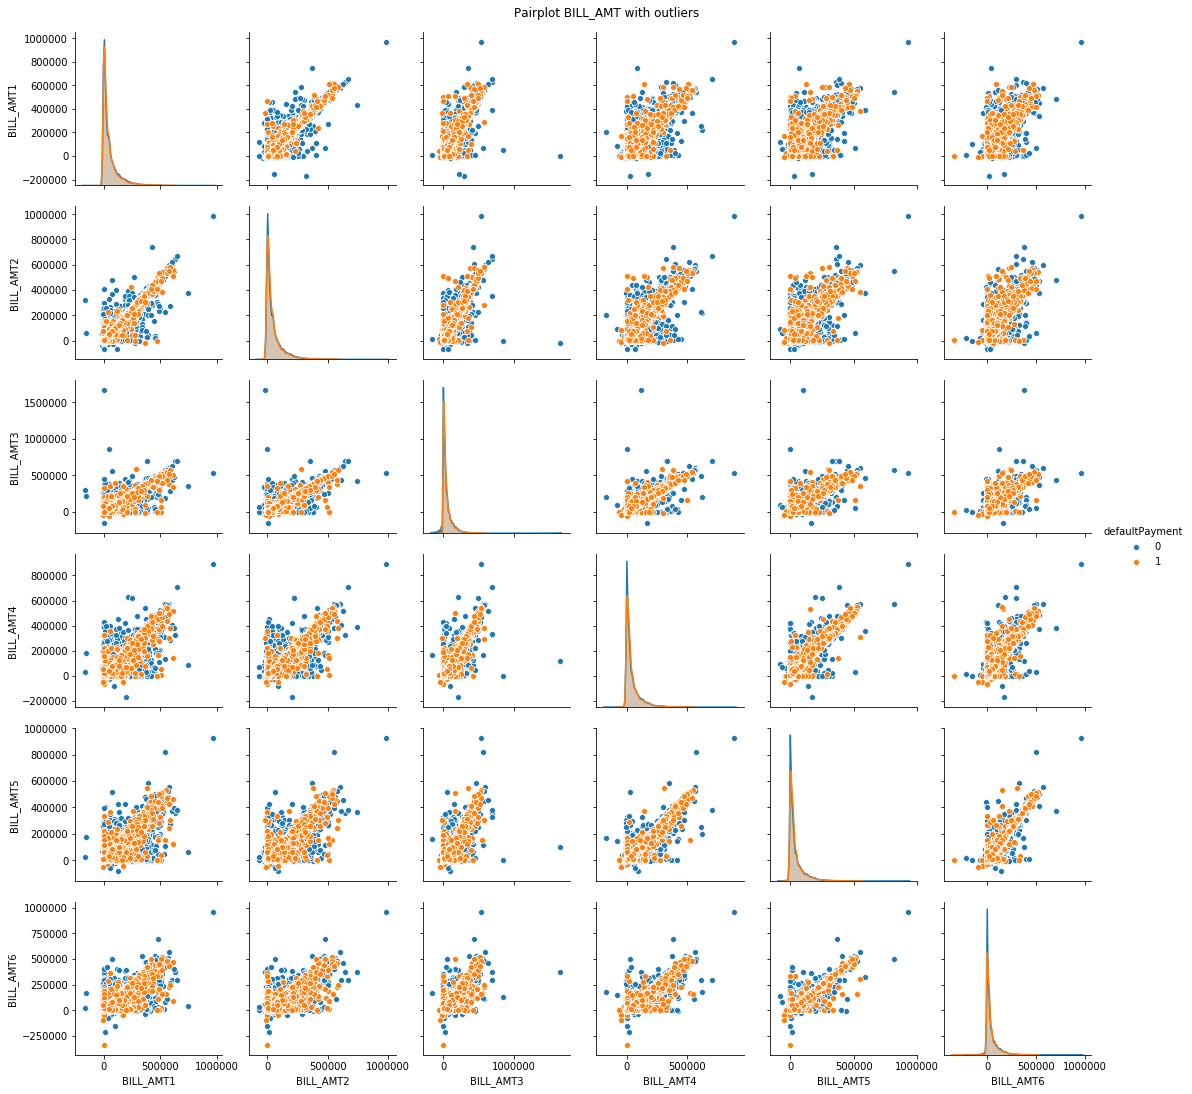

In [77]:
# WITH OUTLIERS 

g1 = sns.pairplot(df, hue = 'defaultPayment',
                 vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
                )
g1.fig.suptitle("Pairplot BILL_AMT with outliers", y = 1.01)


g1.savefig('./Images/BILLAMT_outliers.png')

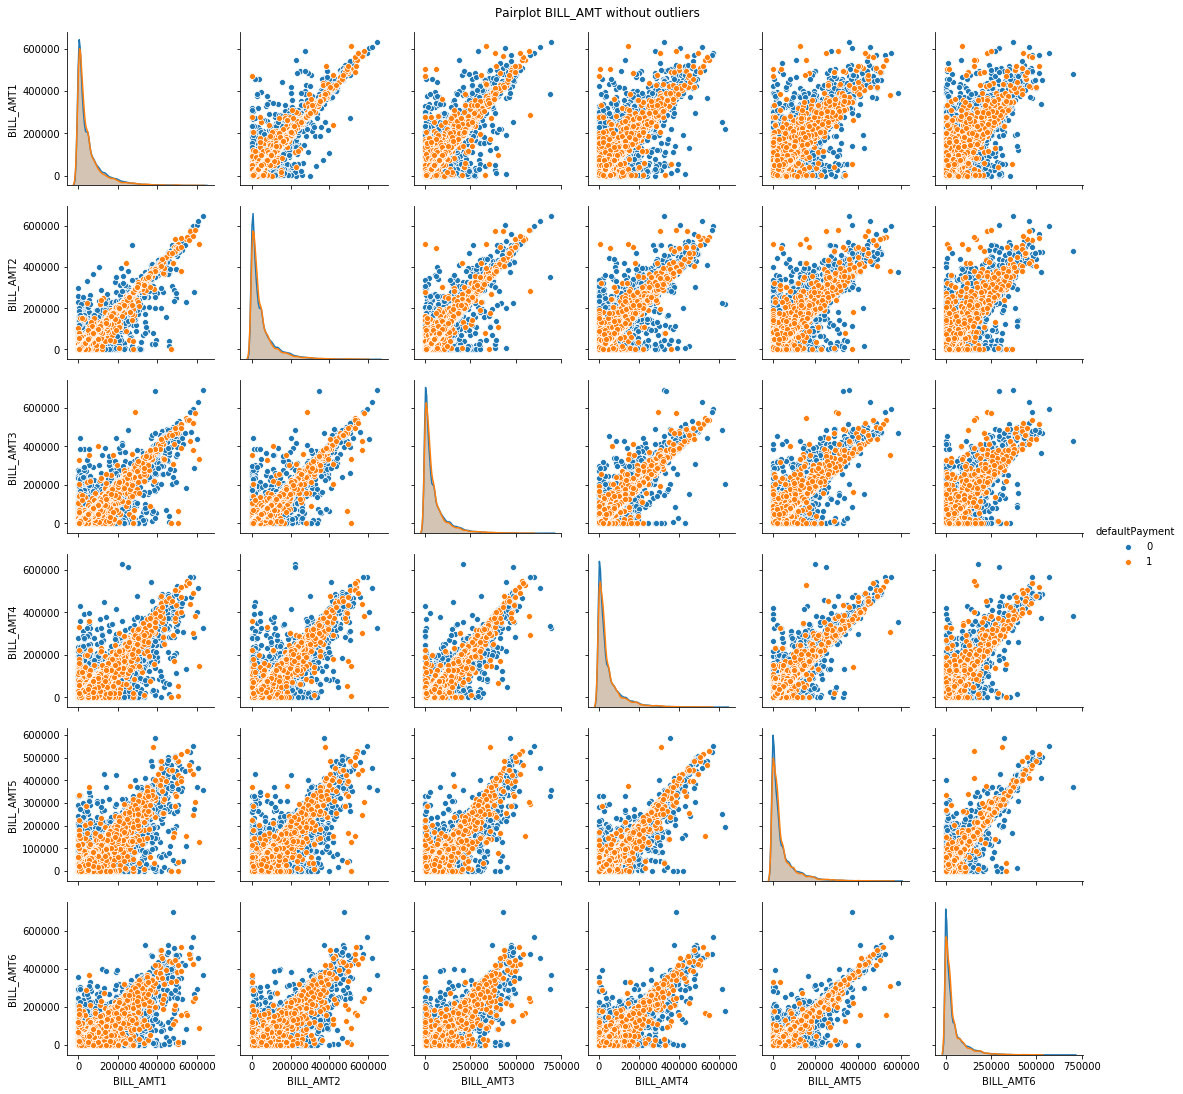

In [78]:
# WITHOUT OUTLIERS 

g2 = sns.pairplot(df_out, hue = 'defaultPayment',
                 vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
                )
g2.fig.suptitle("Pairplot BILL_AMT without outliers", y = 1.01)

g2.savefig('./Images/BILLAMT_withoutoutliers.png')

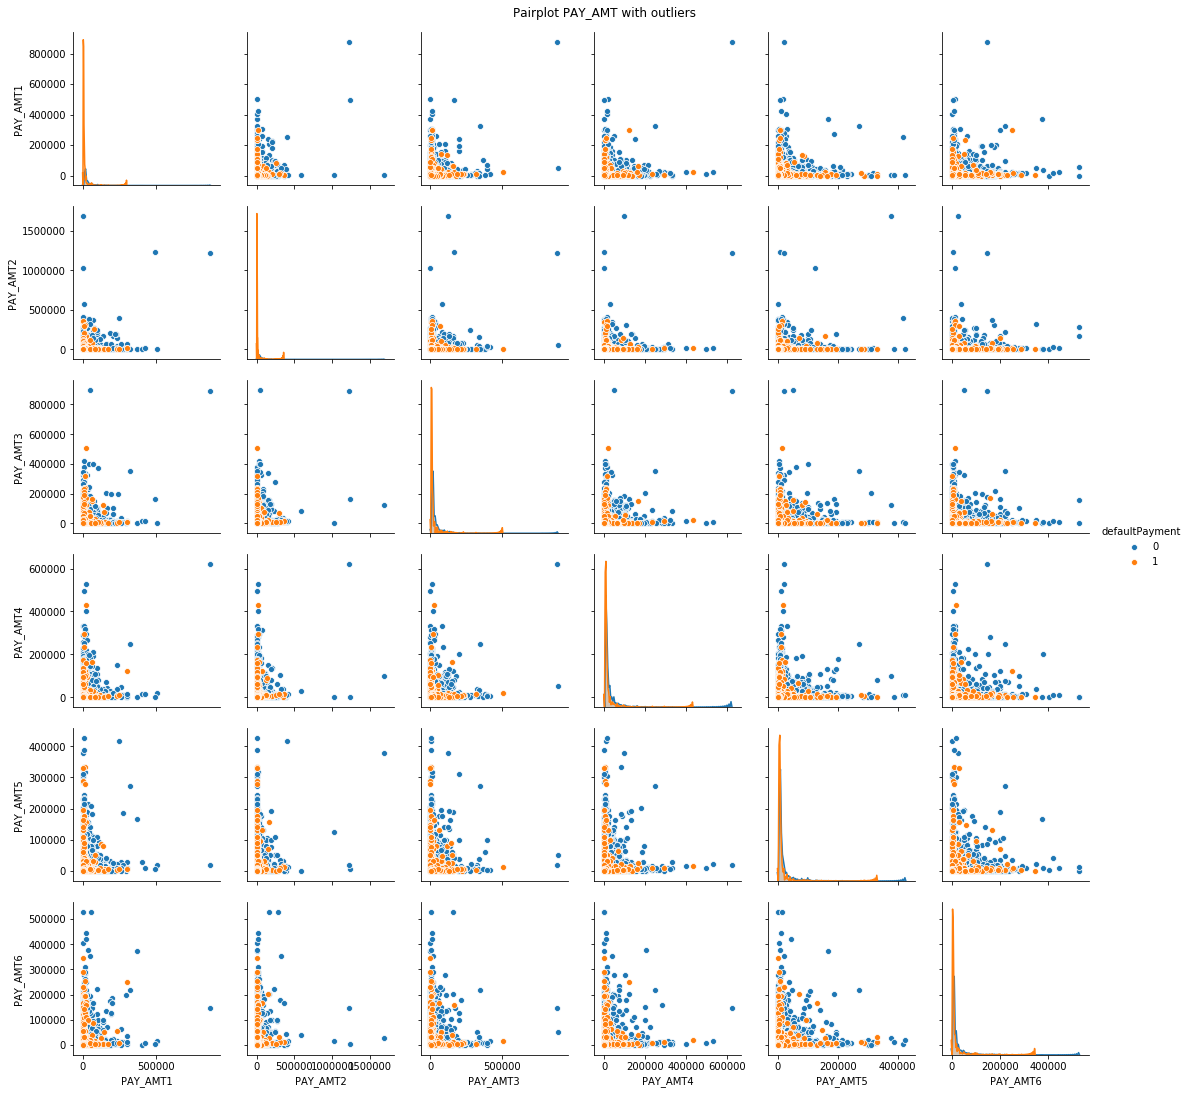

In [79]:
# WITH OUTLIERS 

g3 = sns.pairplot(df, hue = 'defaultPayment',
                 vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
                )

g3.fig.suptitle("Pairplot PAY_AMT with outliers", y = 1.01)

g3.savefig('./Images/PAYAMT_outliers.png')

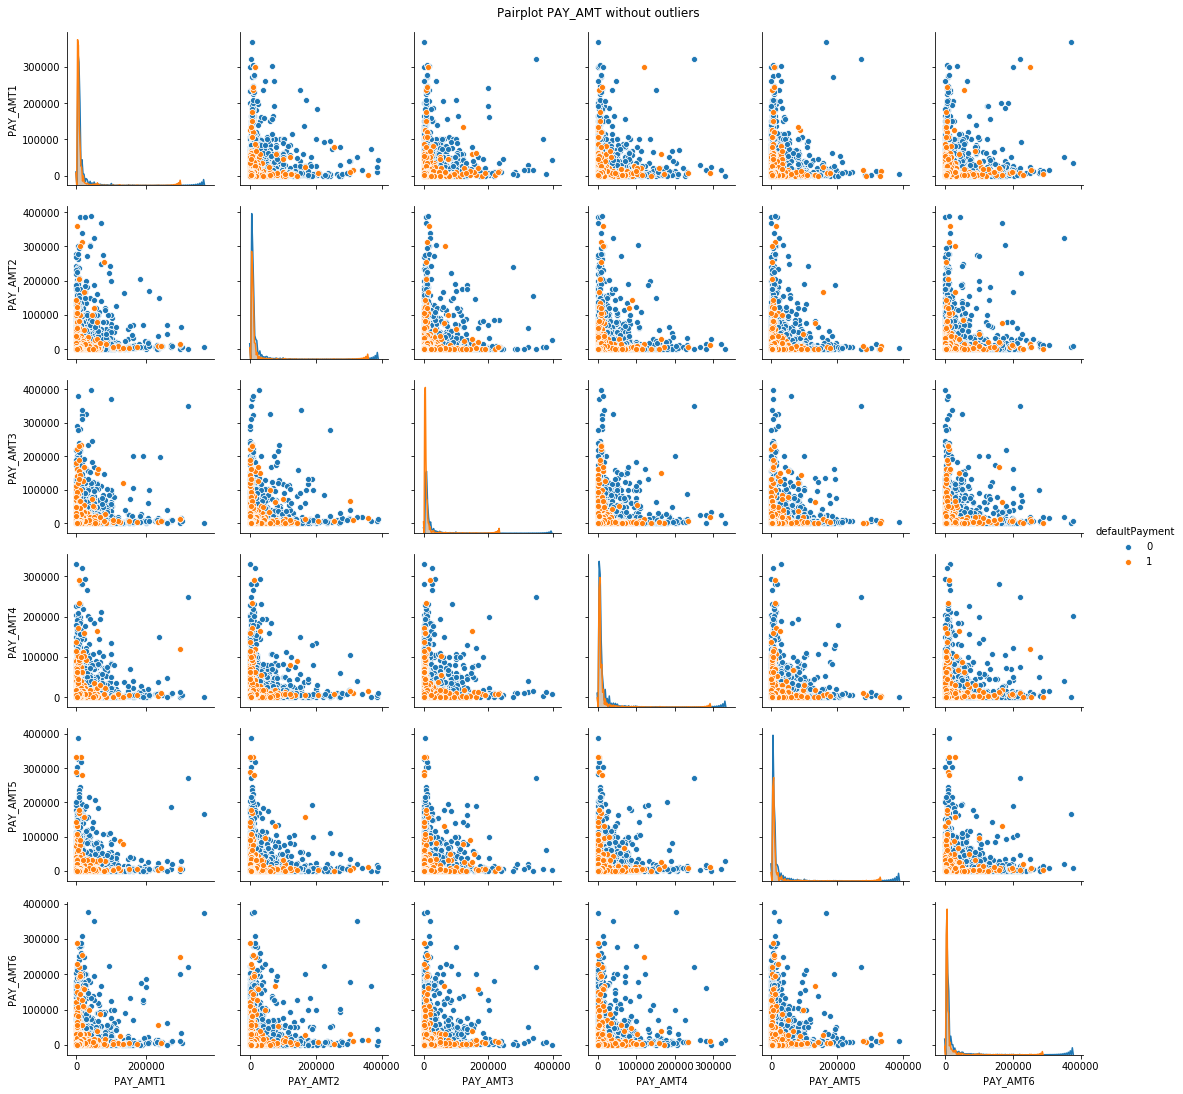

In [80]:
# WITHOUT OUTLIERS 

g4 = sns.pairplot(df_out, hue = 'defaultPayment',
                 vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
                )

g4.fig.suptitle("Pairplot PAY_AMT without outliers", y = 1.01)

g4.savefig('./Images/PAYAMT_without_outliers.png')